# Classification en k - moyennes

Ce type de classification non supervisée est un algorithme de machine learning très utile pour classifier rapidement des bases de données volumineuses. En effet, plutôt que de calculer les distances de l'ensemble des points entre eux, il va procéder ainsi :  
- Il initialise un nombre de centroïdes (de classes) qu'il va placer dans l'espace des points de manière aléatoire.   
- Il associe ensuite à chaque centroïde les points qui lui sont les plus proches, créant ainsi autant de classes que de centroïdes.  
- Il déplace ensuite les centroïdes au centre de gravité de leur classe.  
- Il répète les étapes précédentes jusqu'à la convergence du modèle.  




Pour un nombre de classes donné, cet algorithme cherche à __minimiser la variance intra-classe__ et à __maximiser la variance inter-classes__. 

## k-means avec Python  

Sur Python, on va utiliser la fonction Kmeans de scikit-learn. Elle propose de nombreux paramètres mais le seul qui nous intéresse pour l'instant c'est `n_clusters`, le nombre de classes voulu. On ajuste notre modèle sur nos données avec `.fit` et on obtient nos classes avec `. predict`. 

__À vous!__  
- Faites tourner un modèle k-means sur les données `wine` disponibles dans scikit learn pour essayer de retrouver les 3 classes de vin.   
- Comparez vos résultats avec la vraie classification. L'algorithme a-t-il su partitionner correctement les données?  


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_clusters': list(range(1,26))}

grid_cv = GridSearchCV(KMeans(), param_grid, cv=5)
grid_cv.fit(dfX)

GridSearchCV(cv=5, error_score=nan,
             estimator=KMeans(algorithm='auto', copy_x=True, init='k-means++',
                              max_iter=300, n_clusters=8, n_init=10,
                              n_jobs=None, precompute_distances='auto',
                              random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'n_clusters': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                        13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                        23, 24, 25]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [14]:
grid_cv.best_estimator_

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=23, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [15]:
grid_cv.best_params_


{'n_clusters': 23}

__On corrige ensemble__

## Choisir le nombre de classes

On voit bien que la convergence ou non de l'algorithme tient aussi bien aux données qu'au nombre de classes que l'on choisit. De plus, même si l'algorithme converge il n'est pas dit que le nombre de classes choisi soit pertinent. Que se passerait-il par exemple si nous avions choisi 2 classes pour l'exemple ci-dessus?

Un outil indispensable pour mener une analyse en k-means est l'évolution de la distance de chaque point à son centroïde en fonction du nombre de classes choisi. Cette distance décroît avec le nombre de classes jusqu'à atteindre 0 lorsque le nombre de classes est égal au nombre d'observations. Sur Python, on obtient cette valeur en appelant `.inertia_` depuis un objet KMeans.    

## Limites des k-means

La grande limite des k-means est sans doute que cet algorithme nécessite un choix a priori du nombre de classes. Il existe certes des outils comme le graphique que l'on vient de faire pour orienter notre décision mais il ne reflètera pas forcément la qualité de notre clustering.  

Un bon exemple de cette limite peut s'illustrer avec les données suivantes : 

## Cas pratique 1 : classification des fromages  
- Importez la base carac_fromages.txt et affichez quelques stats descriptives sur ses variables   

On cherche à voir si certains fromages sont plus proches que d'autres en fonction de leurs caractéristiques.  

- Transformez les variables numériques de manière à pouvoir mener une analyse en k-means.  
- Justifiez un choix de nombre de classes avec cette méthode et opérez le clustering de ces données.  
- Observez les noms des fromages d'une même classe. Trouvez-vous logique qu'ils soient associés?  
- Faites une classification avec DBSCAN et comparez les résultats. 


In [4]:
import pandas as pd
fromage = pd.read_csv('data/carac_fromages.txt', sep = "\t")
fromage.head()

,Fromages,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
0,CarredelEst,314,353.5,72.6,26.3,51.6,30.3,21.0,70,20
1,Babybel,314,238.0,209.8,25.1,63.7,6.4,22.6,70,27
2,Beaufort,401,112.0,259.4,33.3,54.9,1.2,26.6,120,41
3,Bleu,342,336.0,211.1,28.9,37.1,27.5,20.2,90,27
4,Camembert,264,314.0,215.9,19.5,103.0,36.4,23.4,60,20


In [5]:
fromage.describe()

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,300.034483,210.086207,185.734483,24.158621,67.562069,13.010345,20.168966,74.586207,26.965517
std,91.914356,108.678923,72.528882,8.129642,24.163098,11.723339,6.959788,28.245755,11.318388
min,70.000000,22.000000,72.600000,3.400000,37.100000,1.200000,4.100000,10.000000,10.000000
25%,292.000000,140.000000,132.900000,23.400000,51.600000,4.900000,17.800000,70.000000,20.000000
50%,321.000000,223.000000,202.300000,26.300000,62.300000,6.400000,21.000000,80.000000,26.000000
75%,355.000000,276.000000,220.500000,29.100000,76.400000,21.100000,23.400000,90.000000,30.000000
max,406.000000,432.000000,334.600000,33.300000,150.500000,36.400000,35.700000,120.000000,51.000000


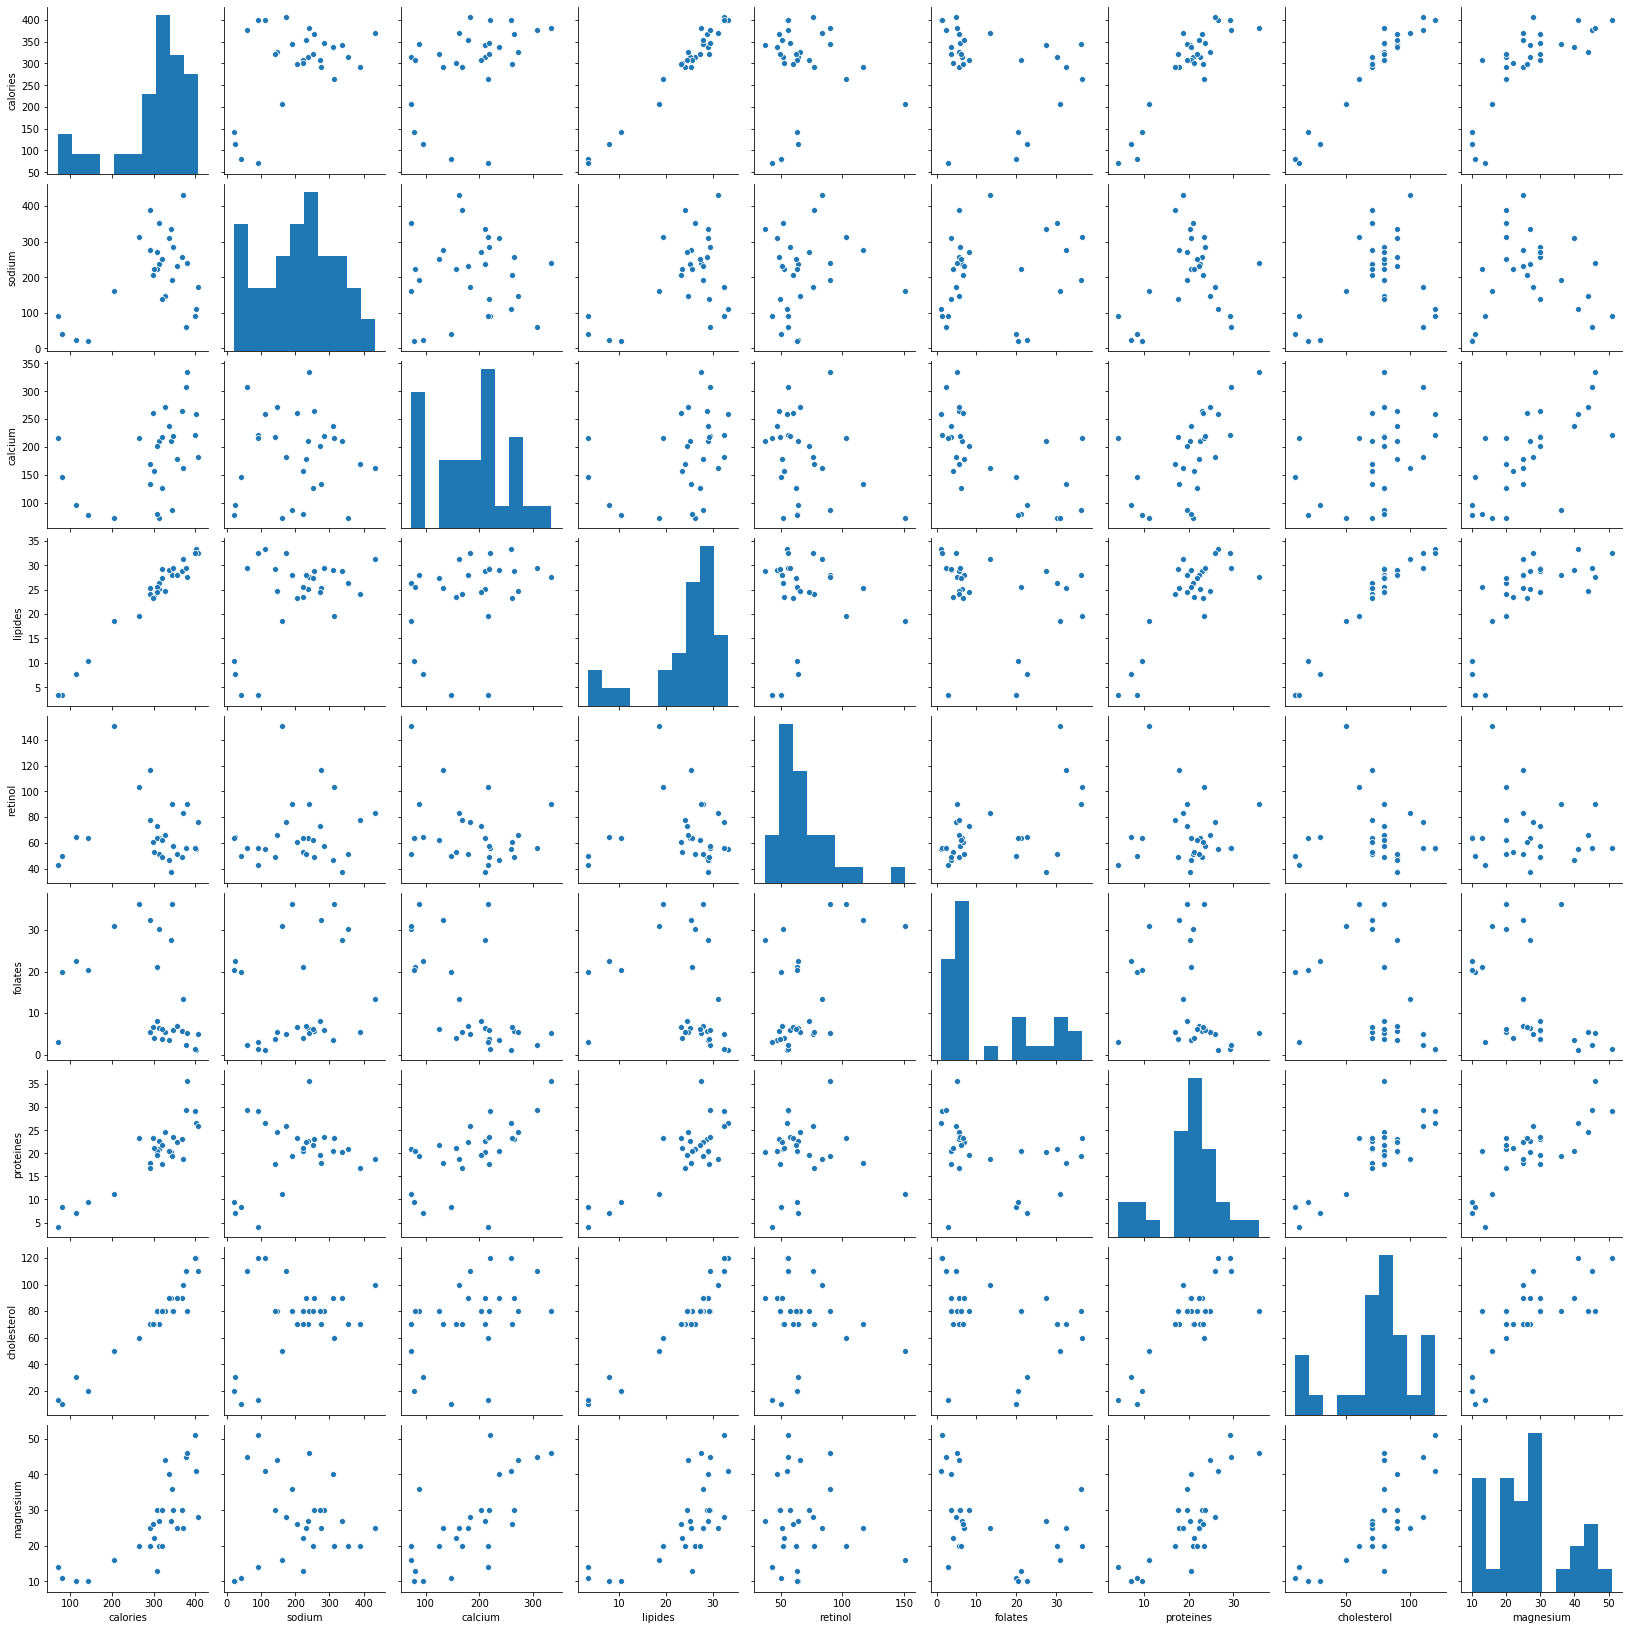

In [29]:
sns.pairplot(fromage)

In [12]:
#from sklearn.preprocessing import StandardScaler

#fromage.loc[:, fromage.columns !='Fromages'] = StandardScaler().fit_transform(fromage.loc[:, fromage.columns !='Fromages'])
#fromage

In [8]:
from sklearn.cluster import KMeans
cls = KMeans(n_clusters=4).fit(fromage.loc[:, fromage.columns !='Fromages'])

In [9]:
cls.labels_

array([3, 1, 2, 1, 3, 1, 3, 3, 1, 2, 3, 2, 2, 3, 1, 0, 0, 1, 1, 2, 0, 1,
       1, 1, 1, 1, 1, 1, 0], dtype=int32)

In [10]:
fromage['Classes'] = cls.labels_
fromage[["Fromages", "Classes"]].sort_values('Classes')

,Fromages,Classes
28,Yaourtlaitent.nat.,0
20,Petitsuisse40,0
16,Fr.frais40nat.,0
15,Fr.frais20nat.,0
26,Tome,1
25,SaintPaulin,1
24,Rocquefort,1
23,Reblochon,1
22,Pyrenees,1
21,PontlEveque,1


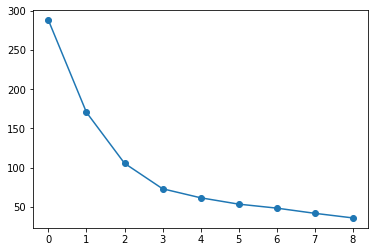

In [11]:
dist2=[]
for x in range(1,10):
    kmeans = KMeans( n_clusters=x).fit(fromage.loc[:, fromage.columns !='Fromages'])
    #print(kmeans.inertia_)
    dist2.append(kmeans.inertia_)
plt.plot(dist2, marker = "o")

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(fromage.loc[:, fromage.columns !='Fromages'])
print('Explained variation per principal component : {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component : [0.5178261  0.23764366 0.09962289]


In [21]:
df = fromage.copy()
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1]
df['pca-three'] = pca_result[:,2]
df.head(2)

,Fromages,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium,Classes,pca-one,pca-two,pca-three
0,CarredelEst,0.15463,1.342968,-1.587464,0.268066,-0.672290,1.500911,0.121519,-0.165242,-0.626309,3,0.333483,2.252121,1.301805
1,Babybel,0.15463,0.261393,0.337679,0.117846,-0.162662,-0.573843,0.355480,-0.165242,0.003101,1,-0.378857,-0.604019,0.307946


In [46]:
kmeansPCA = KMeans(n_clusters=4)
kmeansPCA.fit(pca_result)
classes_5PCA = kmeansPCA.predict(pca_result)
df['classes_5PCA'] =classes_5PCA

In [70]:
kmeansPCA.cluster_centers_

array([[-0.7126042 , -0.41085909,  0.73818895],
       [ 4.71386221, -1.58107265, -0.4023834 ],
       [ 0.7824935 ,  2.66725174, -0.30402344],
       [-2.71479021, -0.78543853, -1.38019421]])

In [49]:
df.head()

,Fromages,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium,Classes,pca-one,pca-two,pca-three,classes_5PCA
0,CarredelEst,0.154630,1.342968,-1.587464,0.268066,-0.672290,1.500911,0.121519,-0.165242,-0.626309,3,0.333483,2.252121,1.301805,2
1,Babybel,0.154630,0.261393,0.337679,0.117846,-0.162662,-0.573843,0.355480,-0.165242,0.003101,1,-0.378857,-0.604019,0.307946,0
2,Beaufort,1.117917,-0.918507,1.033649,1.144354,-0.533301,-1.025253,0.940383,1.636269,1.261920,2,-2.941437,-0.873975,-0.898356,3
3,Bleu,0.464654,1.179093,0.355920,0.593544,-1.283000,1.257844,0.004538,0.555362,0.003101,1,-0.700955,0.158189,1.508308,0
4,Camembert,-0.398983,0.973078,0.423272,-0.583184,1.492574,2.030451,0.472461,-0.525544,-0.626309,3,0.632733,2.622877,-0.615674,2


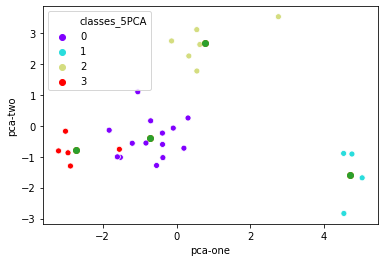

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#sns.scatterplot(data = df, x = df['pca-one'], y = df['pca-two'], hue = df['classes_5PCA'], palette='rainbow')
sns.scatterplot(data = df, x = df['pca-one'], y = df['pca-two'], hue = df['classes_5PCA'], palette='rainbow')
#sns.scatterplot(kmeansPCA.cluster_centers_[:,0],kmeansPCA.cluster_centers_[:,1])
plt.scatter(kmeansPCA.cluster_centers_[:,0],kmeansPCA.cluster_centers_[:,1])
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1])
plt.show()

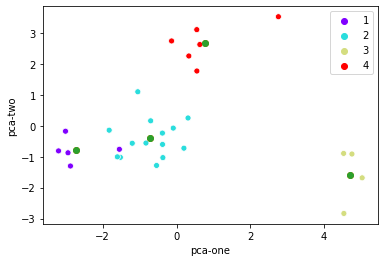

In [148]:
# on détermine la matrice des liens 
from scipy.cluster.hierarchy import dendrogram, linkage
Z1 = linkage(pca_result,method='average',metric='euclidean')

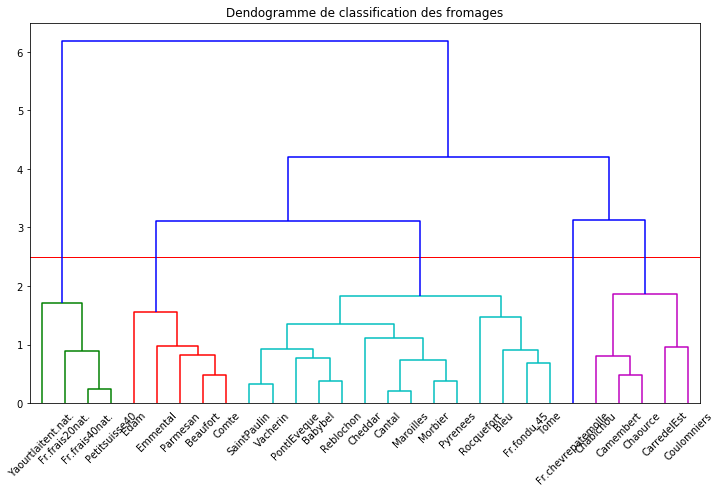

In [150]:
fromages_type = fromage.loc[:, "Fromages"]
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(1,1,1)
ax.set_title("Dendogramme de classification des fromages")
dendrogram(Z1,labels=fromages_type.to_numpy(), orientation='top',color_threshold=2.5)
ax.axhline(y=2.5,c="red",linewidth=1,zorder=0)
plt.show()

In [151]:
from scipy.cluster.hierarchy import fcluster
max_d = 2.5
clusters = fcluster(Z1, max_d, criterion='distance')
clusters



array([4, 3, 2, 3, 4, 3, 4, 4, 3, 2, 4, 2, 2, 5, 3, 1, 1, 3, 3, 2, 1, 3,
       3, 3, 3, 3, 3, 3, 1], dtype=int32)

In [152]:
df['classes_5PCA_CAH'] =clusters

In [153]:
lens = {}      # will contain the lengths for each cluster
centroids = {} # will contain the centroids of each cluster
for idx,clno in enumerate(clusters):
    centroids.setdefault(clno,np.zeros(3))   #nb de components ou features
    centroids[clno] += pca_result[idx,:]
    lens.setdefault(clno,0)
    lens[clno] += 1
# Divide by number of observations in each cluster to get the centroid
for clno in centroids:
    centroids[clno] /= float(lens[clno])
centroids

{4: array([ 0.38658097,  2.49656869, -0.043515  ]),
 3: array([-0.7126042 , -0.41085909,  0.73818895]),
 2: array([-2.71479021, -0.78543853, -1.38019421]),
 5: array([ 2.76205615,  3.520667  , -1.60656564]),
 1: array([ 4.71386221, -1.58107265, -0.4023834 ])}

In [154]:
X = np.array([[0.38658097,  2.49656869, -0.043515],
              [-0.7126042 , -0.41085909,  0.73818895],
              [-2.71479021, -0.78543853, -1.38019421],
             [ 2.76205615,  3.520667  , -1.60656564 ],
             [ 4.71386221, -1.58107265, -0.4023834 ]],np.float64)
km = KMeans(n_clusters=5,init=X, n_init=1).fit(pca_result)

centers = km.cluster_centers_
centers

array([[ 0.38658097,  2.49656869, -0.043515  ],
       [-0.7126042 , -0.41085909,  0.73818895],
       [-2.71479021, -0.78543853, -1.38019421],
       [ 2.76205615,  3.520667  , -1.60656564],
       [ 4.71386221, -1.58107265, -0.4023834 ]])

In [137]:
kmeansPCA.cluster_centers_

array([[-0.7126042 , -0.41085909,  0.73818895],
       [ 4.71386221, -1.58107265, -0.4023834 ],
       [ 0.7824935 ,  2.66725174, -0.30402344],
       [-2.71479021, -0.78543853, -1.38019421]])

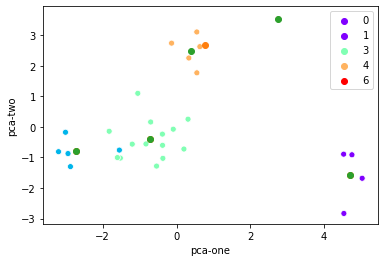

In [155]:
#sns.scatterplot(data = df, x = df['pca-one'], y = df['pca-two'], hue = df['classes_5PCA'], palette='rainbow')
sns.scatterplot(data = df, x = df['pca-one'], y = df['pca-two'], hue = clusters, palette='rainbow')
#sns.scatterplot(kmeansPCA.cluster_centers_[:,0],kmeansPCA.cluster_centers_[:,1])
plt.scatter(kmeansPCA.cluster_centers_[:,0],kmeansPCA.cluster_centers_[:,1])
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1])
plt.show()

In [ ]:
# c'est exactement pareil

In [99]:
from scipy.spatial.distance import pdist
y = pdist(pca_result)

In [102]:
from scipy.cluster.hierarchy import centroid
Z = centroid(y)
Z

array([[ 5.        , 17.        ,  0.20855621,  2.        ],
       [16.        , 20.        ,  0.24350518,  2.        ],
       [25.        , 27.        ,  0.32456183,  2.        ],
       [ 1.        , 23.        ,  0.37140163,  2.        ],
       [18.        , 22.        ,  0.37915034,  2.        ],
       [ 2.        ,  9.        ,  0.48450272,  2.        ],
       [ 4.        ,  7.        ,  0.48761409,  2.        ],
       [14.        , 26.        ,  0.69172923,  2.        ],
       [29.        , 33.        ,  0.71705299,  4.        ],
       [21.        , 32.        ,  0.751587  ,  3.        ],
       [ 6.        , 35.        ,  0.76418376,  3.        ],
       [19.        , 34.        ,  0.79064007,  3.        ],
       [ 3.        , 36.        ,  0.84527868,  3.        ],
       [31.        , 38.        ,  0.84941461,  5.        ],
       [12.        , 40.        ,  0.88542938,  4.        ],
       [15.        , 30.        ,  0.88566674,  3.        ],
       [ 0.        , 10.

In [114]:
clusters2 = fcluster(Z, 3, criterion='distance')
clusters2

array([3, 2, 2, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 4, 2, 1, 1, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 1], dtype=int32)

In [115]:
lens = {}      # will contain the lengths for each cluster
centroids2 = {} # will contain the centroids of each cluster
for idx,clno in enumerate(clusters2):
    centroids2.setdefault(clno,np.zeros(3))   #nb de components ou features
    centroids2[clno] += pca_result[idx,:]
    lens.setdefault(clno,0)
    lens[clno] += 1
# Divide by number of observations in each cluster to get the centroid
for clno in centroids2:
    centroids2[clno] /= float(lens[clno])
centroids2

{3: array([ 0.38658097,  2.49656869, -0.043515  ]),
 2: array([-1.23949525, -0.50943262,  0.1807197 ]),
 4: array([ 2.76205615,  3.520667  , -1.60656564]),
 1: array([ 4.71386221, -1.58107265, -0.4023834 ])}

In [116]:
kmeansPCA.cluster_centers_

array([[-0.7126042 , -0.41085909,  0.73818895],
       [ 4.71386221, -1.58107265, -0.4023834 ],
       [ 0.7824935 ,  2.66725174, -0.30402344],
       [-2.71479021, -0.78543853, -1.38019421]])

In [118]:
X2 = np.array([[ 0.38658097,  2.49656869, -0.043515  ],
              [-1.23949525, -0.50943262,  0.1807197 ],
              [ 2.76205615,  3.520667  , -1.60656564],
             [ 4.71386221, -1.58107265, -0.4023834 ]],np.float64)
km2 = KMeans(n_clusters=4,init=X2, n_init=1).fit(pca_result)

centers2 = km2.cluster_centers_
centers2

array([[ 0.38658097,  2.49656869, -0.043515  ],
       [-1.23949525, -0.50943262,  0.1807197 ],
       [ 2.76205615,  3.520667  , -1.60656564],
       [ 4.71386221, -1.58107265, -0.4023834 ]])

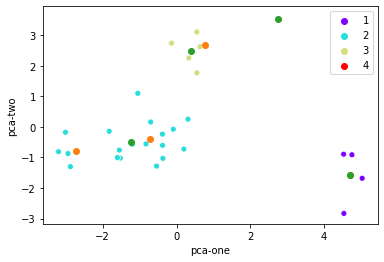

In [126]:
#sns.scatterplot(data = df, x = df['pca-one'], y = df['pca-two'], hue = df['classes_5PCA'], palette='rainbow')
sns.scatterplot(data = df, x = df['pca-one'], y = df['pca-two'], hue = clusters2, palette='rainbow')
#sns.scatterplot(kmeansPCA.cluster_centers_[:,0],kmeansPCA.cluster_centers_[:,1])
plt.scatter(kmeansPCA.cluster_centers_[:,0],kmeansPCA.cluster_centers_[:,1])
plt.scatter(km2.cluster_centers_[:,0],km2.cluster_centers_[:,1])
plt.show()

In [157]:
#https://towardsdatascience.com/clustering-with-more-than-two-features-try-this-to-explain-your-findings-b053007d680a
import plotly.express as px
fig = px.scatter_matrix(fromage.loc[:, fromage.columns !='Fromages'],
width=1200, height=1600)
#fig.show()

In [158]:
kmeans3 = KMeans(
        n_clusters=4, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
kmeans3.fit(fromage.loc[:, fromage.columns !='Fromages'])


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [160]:
clusters3=pd.DataFrame(fromage.loc[:, fromage.columns !='Fromages'])
clusters3['label']=kmeans3.labels_
polar=clusters3.groupby("label").mean().reset_index()
polar=pd.melt(polar,id_vars=["label"])
fig4 = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=800,width=1400)
#fig.show()